In [24]:
import torch
import numpy as np
from matplotlib import pyplot as plt

In [26]:
gt_out = torch.load("6trial_logits_CIFAR10(16384)_ResNet18-2048.pkl")
ac_out = torch.load("6acts_logits_CIFAR10(16384)_ResNet18-2048.pkl")
gt_out = torch.stack(gt_out, dim = 0)

In [27]:
print(gt_out.shape)
print(ac_out.shape)
gt_std = gt_out.std(0).mean(-1)
print(gt_std.shape)

torch.Size([6, 10000, 10])
torch.Size([10000, 10, 2048])
torch.Size([10000])


In [28]:
from tqdm import tqdm

result = torch.zeros(ac_out.shape[:-1])
for i in tqdm(range(ac_out.shape[0])):
    for j in range(ac_out.shape[1]):
        hist = np.histogram(ac_out[i, j][ac_out[i, j].nonzero()], bins=50, density=True)
        data = hist[0]
        ent = -(data * np.log(np.maximum(np.abs(data), 1e-10))).sum()
        result[i, j] = ent

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:19<00:00, 517.57it/s]


In [29]:
ac_ent = result.mean(-1)

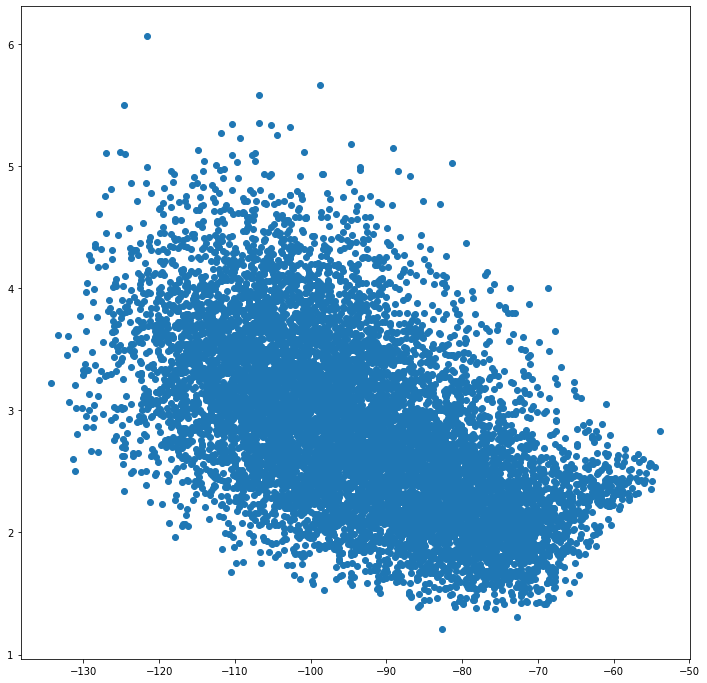

In [30]:
plt.figure(figsize = (12, 12))
plt.scatter(ac_ent, gt_std)
plt.show()